# Metropolis-Hastings sampling

- Use Q(x->x') Transition probability as Normal(center=x,scale=1) ==> Q(x->x')=Q(x'->x) 
- $\pi$ is Gaussian mixture (Desired distribution)

<img src="../../img/Metropolis01.png"/>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from lib.bayesian1Dmd import *
from lib.plotmd import plotDistribution

In [2]:
def sampleMetropolis(dist,start,num_samples,scale=1.0):
    samples=[start]
    trajectory=[]
    counter=0
    while counter<num_samples:
        x=samples[-1]
        trajectory.append(x)
        newx=np.random.normal(x,scale)
        densities=dist.getDensities(np.array([x,newx]))
        p=min(1,densities[1]/densities[0])
        accept= np.random.uniform()

        if accept<=p:
            samples.append(newx)
            counter+=1
    samples.pop(0)
    return samples,trajectory

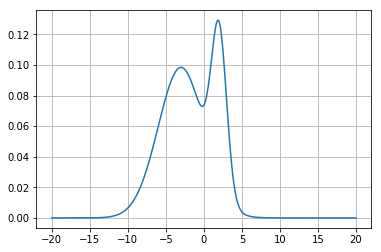

In [3]:
# want to sample from the following distribution
MM=2
# upper bound Gaussian
Mu1,S1=1,6
# Mixture parameters
Mu21,S21=-3,3
Mu22,S22=2,1

numPoints=10000000
dist=GMixtureM(-20,20,0.001)
dist.addGausian(M=Mu21,S=S21,weight=0.74)
dist.addGausian(M=Mu22,S=S22,weight=0.26)
plt.plot(dist.domain,dist.getDist())
plt.grid()

30 samples accepted and 9 samples rejected, total 39
correlation: 0.7521109459417291


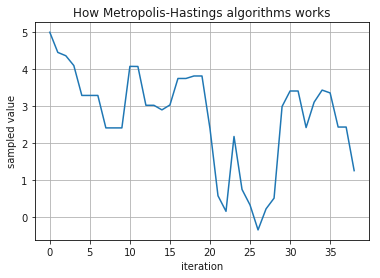

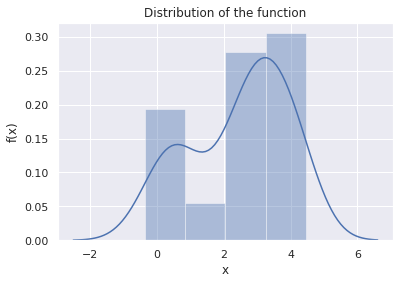

In [4]:
samples,trajectory=sampleMetropolis(dist,start=5,num_samples=30)

corr=np.corrcoef(samples[:-1],samples[1:])
print("{} samples accepted and {} samples rejected, total {}\ncorrelation: {}".format(len(samples),len(trajectory)-len(samples)
                                                                    ,len(trajectory),corr[0,1]))

plt.figure()
plt.title("How Metropolis-Hastings algorithms works")
plt.plot(trajectory)
plt.xlabel("iteration")
plt.ylabel("sampled value")
plt.grid()
plt.figure()
plotDistribution(samples,"Distribution of the function")

## The effect of changing the scale for the transition distribution-1

- big scale ==> big steps ==> the algorithm stack in the same point for long time
- smale scale ==> small steps ==> the algorithm doesn't reject too many points and the samples became in tiny region

10 samples accepted and 59 samples rejected, total 69
correlation: -0.6218638980025222


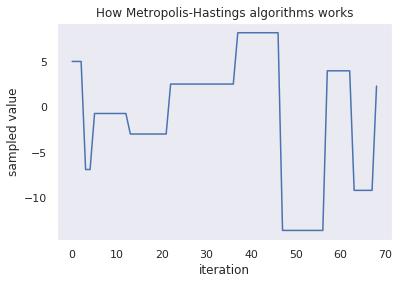

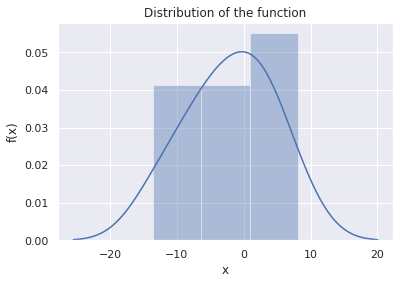

In [5]:
samples,trajectory=sampleMetropolis(dist,start=5,num_samples=10,scale=30)

corr=np.corrcoef(samples[:-1],samples[1:])
print("{} samples accepted and {} samples rejected, total {}\ncorrelation: {}".format(len(samples),len(trajectory)-len(samples)
                                                                    ,len(trajectory),corr[0,1]))

plt.figure()
plt.title("How Metropolis-Hastings algorithms works")
plt.plot(trajectory)
plt.xlabel("iteration")
plt.ylabel("sampled value")
plt.grid()
plt.figure()
plotDistribution(samples,"Distribution of the function")

30 samples accepted and 0 samples rejected, total 30
correlation: 0.9232229540672109


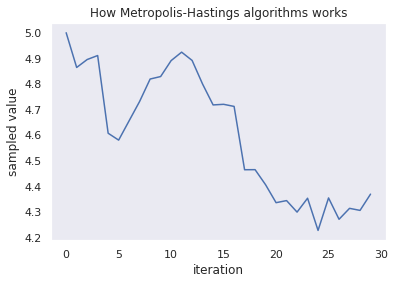

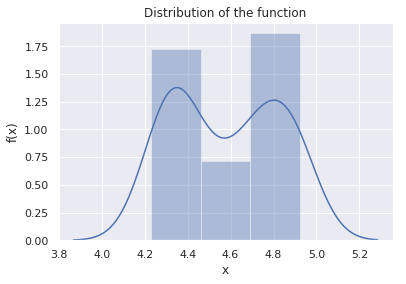

In [6]:
samples,trajectory=sampleMetropolis(dist,start=5,num_samples=30,scale=0.1)

corr=np.corrcoef(samples[:-1],samples[1:])
print("{} samples accepted and {} samples rejected, total {}\ncorrelation: {}".format(len(samples),len(trajectory)-len(samples)
                                                                    ,len(trajectory),corr[0,1]))

plt.figure()
plt.title("How Metropolis-Hastings algorithms works")
plt.plot(trajectory)
plt.xlabel("iteration")
plt.ylabel("sampled value")
plt.grid()
plt.figure()
plotDistribution(samples,"Distribution of the function")

## Effect of changing the number of samples

1000 samples accepted and 113 samples rejected, total 1113
correlation: 0.9581619789697716


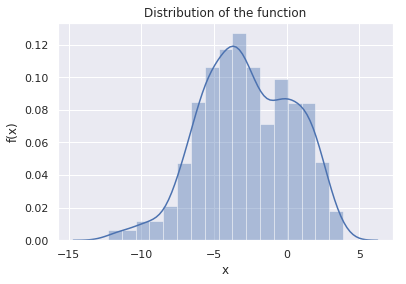

In [7]:
samples,trajectory=sampleMetropolis(dist,start=5,num_samples=1000)
corr=np.corrcoef(samples[:-1],samples[1:])
print("{} samples accepted and {} samples rejected, total {}\ncorrelation: {}".format(len(samples),len(trajectory)-len(samples)
                                                                    ,len(trajectory),corr[0,1]))

plotDistribution(samples,"Distribution of the function")

10000 samples accepted and 1314 samples rejected, total 11314
correlation: 0.9564162230861822


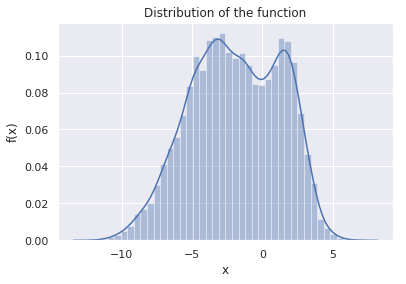

In [8]:
samples,trajectory=sampleMetropolis(dist,start=5,num_samples=10000)
corr=np.corrcoef(samples[:-1],samples[1:])
print("{} samples accepted and {} samples rejected, total {}\ncorrelation: {}".format(len(samples),len(trajectory)-len(samples)
                                                                    ,len(trajectory),corr[0,1]))

plotDistribution(samples,"Distribution of the function")

100000 samples accepted and 13168 samples rejected, total 113168
correlation: 0.9594382260283278


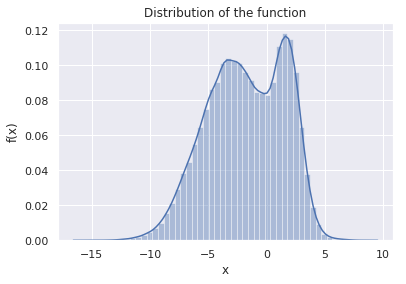

In [9]:
samples,trajectory=sampleMetropolis(dist,start=5,num_samples=100000)
corr=np.corrcoef(samples[:-1],samples[1:])
print("{} samples accepted and {} samples rejected, total {}\ncorrelation: {}".format(len(samples),len(trajectory)-len(samples)
                                                                    ,len(trajectory),corr[0,1]))

plotDistribution(samples,"Distribution of the function")

## The effect of changing the scale for the transition distribution-2

In the following sampling, we used transition distribution with scale 1. the resulted distribution is best between all the results

compare with the following two

10000 samples accepted and 1328 samples rejected, total 11328
correlation: 0.9646644947915903


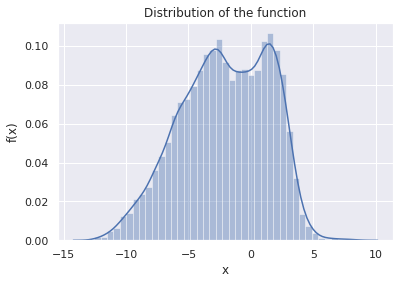

In [10]:
samples,trajectory=sampleMetropolis(dist,start=5,num_samples=10000)
corr=np.corrcoef(samples[:-1],samples[1:])
print("{} samples accepted and {} samples rejected, total {}\ncorrelation: {}".format(len(samples),len(trajectory)-len(samples)
                                                                    ,len(trajectory),corr[0,1]))

plotDistribution(samples,"Distribution of the function")

In the following sampling, we used transition distribution with scale 10 and thus the algorithm makes big steps
- more rejected samples

10000 samples accepted and 16468 samples rejected, total 26468
correlation: 0.15529910955311257


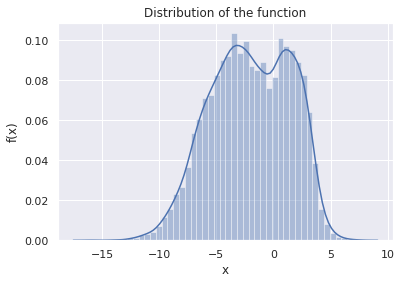

In [11]:
samples,trajectory=sampleMetropolis(dist,start=5,num_samples=10000,scale=10)
corr=np.corrcoef(samples[:-1],samples[1:])
print("{} samples accepted and {} samples rejected, total {}\ncorrelation: {}".format(len(samples),len(trajectory)-len(samples)
                                                                    ,len(trajectory),corr[0,1]))

plotDistribution(samples,"Distribution of the function")

In the following sampling, we used transition distribution with scale 0.1 and thus the algorithm makes small steps
- the algorithm keep close to the same point too long time
- less rejected samples

10000 samples accepted and 192 samples rejected, total 10192
correlation: 0.9985661643818826


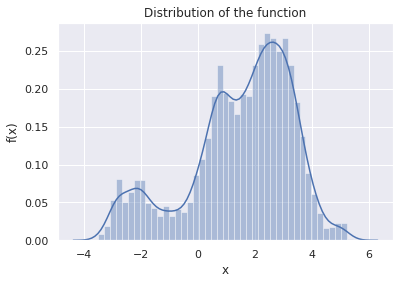

In [12]:
samples,trajectory=sampleMetropolis(dist,start=5,num_samples=10000,scale=0.1)
corr=np.corrcoef(samples[:-1],samples[1:])
print("{} samples accepted and {} samples rejected, total {}\ncorrelation: {}".format(len(samples),len(trajectory)-len(samples)
                                                                    ,len(trajectory),corr[0,1]))

plotDistribution(samples,"Distribution of the function")